In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Mean of data

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
print(df['Age'])

0      19.0
1      21.0
2      20.0
3      23.0
4      31.0
       ... 
195    35.0
196    45.0
197    32.0
198    32.0
199    30.0
Name: Age, Length: 200, dtype: float64


Median of data

In [7]:
imputer = SimpleImputer(strategy='median')
df['Age']=imputer.fit_transform(df[['Age']])
print(df['Age'])

0      19.0
1      21.0
2      20.0
3      23.0
4      31.0
       ... 
195    35.0
196    45.0
197    32.0
198    32.0
199    30.0
Name: Age, Length: 200, dtype: float64


Label Encoding: Convert categorical labels into numerical integers

In [10]:
label_encoder = LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
print(df['Age'])

0       1
1       3
2       2
3       5
4      13
       ..
195    17
196    27
197    14
198    14
199    12
Name: Age, Length: 200, dtype: int64


One-Hot Encoding: Create binary columns for each category

In [11]:
ohe = OneHotEncoder()
encoded = ohe.fit_transform(df[['Age']])
print(df['Age'])

0       1
1       3
2       2
3       5
4      13
       ..
195    17
196    27
197    14
198    14
199    12
Name: Age, Length: 200, dtype: int64


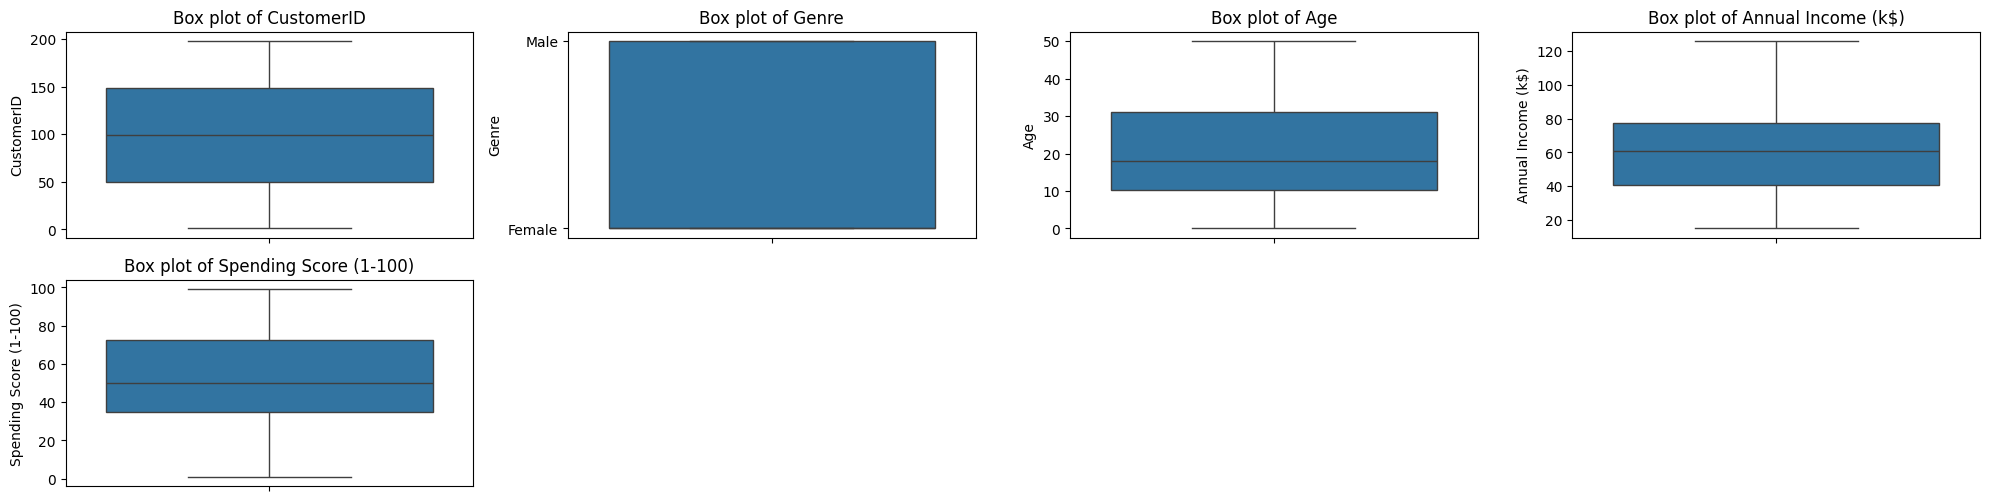

In [14]:
features = df.columns.tolist()
# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()


removing outliers

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,1,15,39
1,2,Male,3,15,81
2,3,Female,2,16,6
3,4,Female,5,16,77
4,5,Female,13,17,40
...,...,...,...,...,...
193,194,Female,20,113,91
194,195,Female,29,120,16
195,196,Female,17,120,79
196,197,Female,27,126,28


checking if outliers are removed

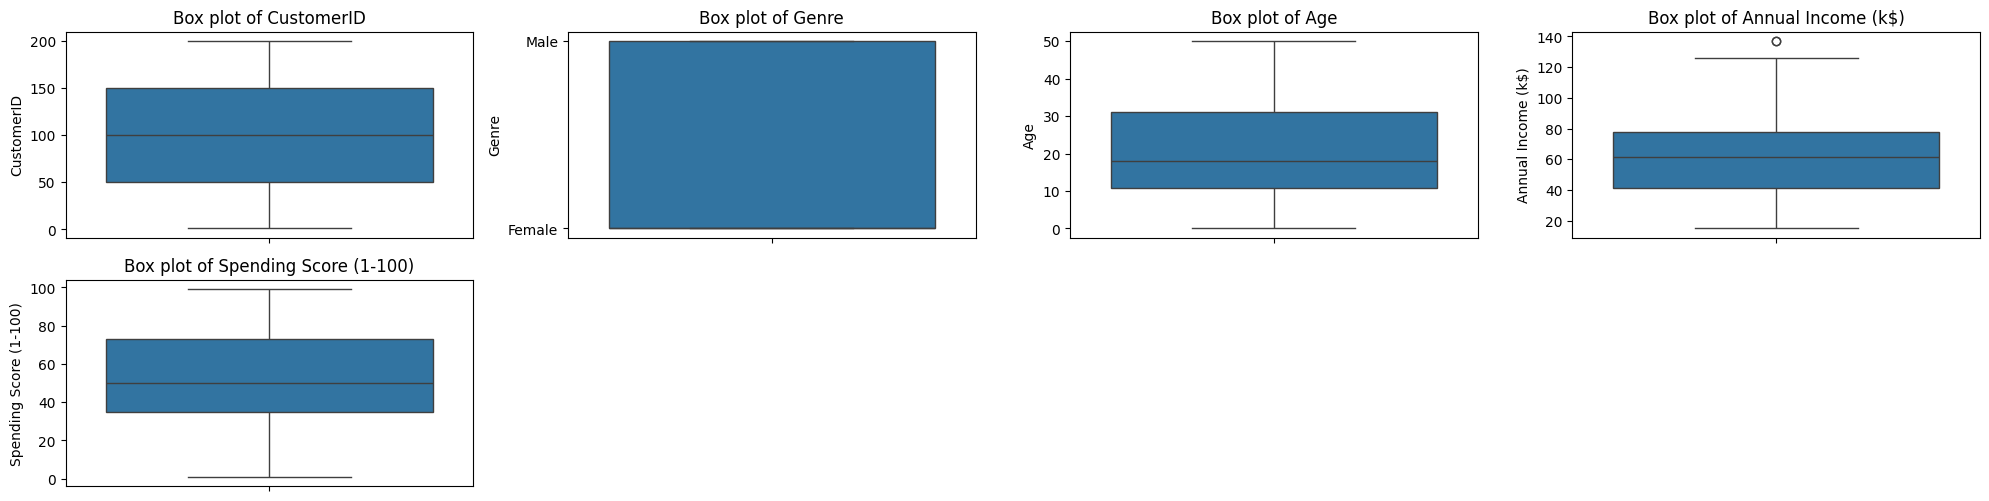

In [12]:
features = df.columns.tolist()
# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()
